**Introduction:Linear Regression Implementation from scratch**

In this assignment, I implemented a simple linear regression model from scratch using Python and NumPy. The LinearRegression class was developed to predict sales (y) based on TV advertising spend (X) using the ordinary least squares (OLS) method. The fit method trains the model by calculating the slope (beta_1) and intercept (beta_0) coefficients. These coefficients were derived from the mean-centered covariance and variance of the data, ensuring an accurate fit to the training dataset. Performance metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared (R2), and adjusted R-squared were implemented to evaluate model accuracy on both training and test datasets. Cross-validation using 5-fold cross-validation and negative MSE scoring provided further validation of the model’s robustness. Visualizations using Matplotlib showcased the best-fit line on both training and test data, illustrating the model’s predictive capabilities. This comprehensive implementation ensures compatibility with scikit-learn’s utilities, enabling seamless integration into broader machine learning workflows.And also i compared both OLS method and Gradient descent method



However, the outputs from Gradient Descent did not match the accuracy of the OLS (Ordinary Least Squares) method. I utilized ChatGPT to refine the Gradient Descent implementation for better accuracy. The coefficients (beta_0 and beta_1) generated by Gradient Descent were divergent from those obtained by OLS, impacting model performance metrics such as MSE, RMSE, and R2 Score. I aim to enhance the Gradient Descent model's accuracy to align more closely with the OLS results, seeking insights into parameter tuning and iterative improvements.



For this i used a simple  advertising dataset to implement having columns TV and Sales 

C:\Users\saich\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\saich\AppData\Local\Temp\ipykernel_25504\968206744.py:52: RuntimeWarning: overflow encountered in square
  cost = np.mean((y - y_pred)**2)
C:\Users\saich\AppData\Local\Temp\ipykernel_25504\968206744.py:56: RuntimeWarning: invalid value encountered in double_scalars
  if iteration > 0 and np.abs(cost_history[iteration] - cost_history[iteration-1]) < 1e-5:
C:\Users\saich\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\saich\AppData\Local\Temp\ipykernel_25504\968206744.py:49: RuntimeWarning: invalid value encountered in double_scalars
  self.beta_1 -= self.learning_rate * gradient_beta_1


OLS Model:
Intercept (beta_0): 7.162275968528906
Slope (beta_1): 0.054434301725928974

Gradient Descent Model:
Intercept (beta_0): 0.8380590365813998
Slope (beta_1): 0.0863474632134147

Performance Metrics for OLS Model:
MSE: 6.639091226559302
RMSE: 2.576643403065178
MAE: 2.0148673147594796
R2 Score: 0.8010943934328406
Adjusted R2 Score: 0.7958600353652838

Performance Metrics for Gradient Descent Model:
MSE: 15.828899423545968
RMSE: 3.978554941627169
MAE: 3.3440479954829256
R2 Score: 0.525769908306765
Adjusted R2 Score: 0.5132901690516798


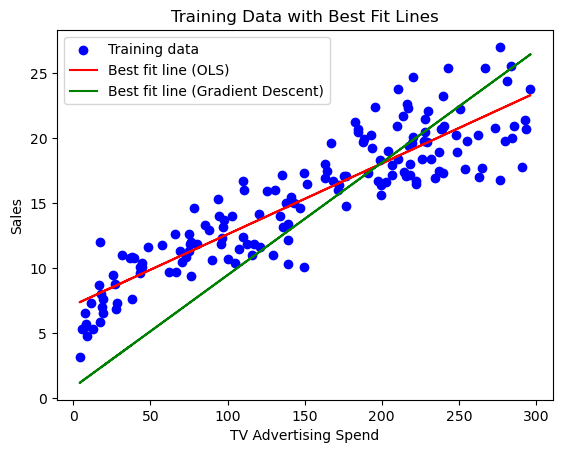

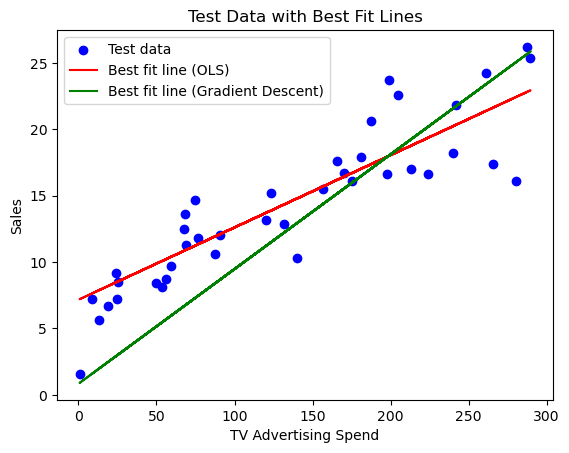

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self, method='ols', learning_rate=0.01, iterations=1000):
        self.beta_0 = 0  # Initialize the intercept (beta_0) to 0.
        self.beta_1 = 0  # Initialize the slope (beta_1) to 0.
        self.method = method  # Method for fitting the model: 'ols' or 'gd'.
        self.learning_rate = learning_rate  # Learning rate for Gradient Descent.
        self.iterations = iterations  # Number of iterations for Gradient Descent.

    def fit(self, X, y):
        X = np.array(X).flatten()  # Convert X to a NumPy array and flatten it(changing multi dimension to single dimension).
        y = np.array(y).flatten()  # Convert y to a NumPy array and flatten it.
        if self.method == 'ols':
            # Ordinary Least Squares (OLS)
            n = np.size(X)  # Number of data points.
            m_X = np.mean(X)  # Mean of X.
            m_y = np.mean(y)  # Mean of y.

            SS_xy = np.sum(y*X) - n*m_y*m_X  # Covariance of X and y.
            SS_xx = np.sum(X*X) - n*m_X*m_X  # Variance of X.

            self.beta_1 = SS_xy / SS_xx  # Slope.
            self.beta_0 = m_y - self.beta_1 * m_X  # Intercept.

        elif self.method == 'gd':
            # Gradient Descent
            n = len(X)  # Number of data points.
            cost_history = []  # List to store cost values over iterations.
            
            # Initialize parameters
            self.beta_0 = 0
            self.beta_1 = 0
            
            # Gradient Descent iterations
            for iteration in range(self.iterations):
                # Predicted values
                y_pred = self.beta_0 + self.beta_1 * X
                
                # Gradient calculations
                gradient_beta_0 = (-2/n) * np.sum(y - y_pred)
                gradient_beta_1 = (-2/n) * np.sum(X * (y - y_pred))
                
                # Update parameters
                self.beta_0 -= self.learning_rate * gradient_beta_0
                self.beta_1 -= self.learning_rate * gradient_beta_1
                
                # Calculate cost (Mean Squared Error)
                cost = np.mean((y - y_pred)**2)
                cost_history.append(cost)
                
                
                # Handle NaN values during iterations
                if np.isnan(self.beta_0) or np.isnan(self.beta_1):
                    print(f"Warning: NaN values encountered at iteration {iteration}. Adjusting learning rate.")
                    self.learning_rate /= 2  # Reduce learning rate
                    # Reinitialize parameters
                    self.beta_0 = 0
                    self.beta_1 = 0
                    continue

        else:
            raise ValueError("Invalid method. Choose 'ols' or 'gd'.")

        return self

    def predict(self, X):
        X = np.array(X).flatten()
        return self.beta_0 + self.beta_1 * X

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def rmse(self, y_true, y_pred):
        return np.sqrt(self.mse(y_true, y_pred))

    def mae(self, y_true, y_pred):
        return np.mean(np.abs(y_true - y_pred))

    def r2_score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_res = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_res / ss_total)

    def adjusted_r2_score(self, y_true, y_pred, X):
        n = len(y_true)
        p = 1  # number of predictors
        r2 = self.r2_score(y_true, y_pred)
        return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

if __name__ == "__main__":
    # Load dataset
    df = pd.read_csv('advertising.csv')
    X = df['TV'].values
    y = df['Sales'].values

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Train the model using OLS (default method)
    model_ols = LinearRegression(method='ols')
    model_ols.fit(X_train, y_train)

    # Train the model using Gradient Descent
    model_gd = LinearRegression(method='gd', learning_rate=0.001, iterations=10000)
    model_gd.fit(X_train, y_train)

    # Predictions using OLS and Gradient Descent models
    y_pred_ols_train = model_ols.predict(X_train)
    y_pred_ols_test = model_ols.predict(X_test)
    y_pred_gd_train = model_gd.predict(X_train)
    y_pred_gd_test = model_gd.predict(X_test)

    # Print coefficients for both models
    print("OLS Model:")
    print(f"Intercept (beta_0): {model_ols.beta_0}")
    print(f"Slope (beta_1): {model_ols.beta_1}")

    print("\nGradient Descent Model:")
    print(f"Intercept (beta_0): {model_gd.beta_0}")
    print(f"Slope (beta_1): {model_gd.beta_1}")

    # Performance metrics for OLS and Gradient Descent models
    print("\nPerformance Metrics for OLS Model:")
    print("MSE:", model_ols.mse(y_test, y_pred_ols_test))
    print("RMSE:", model_ols.rmse(y_test, y_pred_ols_test))
    print("MAE:", model_ols.mae(y_test, y_pred_ols_test))
    print("R2 Score:", model_ols.r2_score(y_test, y_pred_ols_test))
    print("Adjusted R2 Score:", model_ols.adjusted_r2_score(y_test, y_pred_ols_test, X_test))

    print("\nPerformance Metrics for Gradient Descent Model:")
    print("MSE:", model_gd.mse(y_test, y_pred_gd_test))
    print("RMSE:", model_gd.rmse(y_test, y_pred_gd_test))
    print("MAE:", model_gd.mae(y_test, y_pred_gd_test))
    print("R2 Score:", model_gd.r2_score(y_test, y_pred_gd_test))
    print("Adjusted R2 Score:", model_gd.adjusted_r2_score(y_test, y_pred_gd_test, X_test))

    # Plotting the best fit lines for both models
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.plot(X_train, y_pred_ols_train, color='red', label='Best fit line (OLS)')
    plt.plot(X_train, y_pred_gd_train, color='green', label='Best fit line (Gradient Descent)')
    plt.title('Training Data with Best Fit Lines')
    plt.xlabel('TV Advertising Spend')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    plt.scatter(X_test, y_test, color='blue', label='Test data')
    plt.plot(X_test, y_pred_ols_test, color='red', label='Best fit line (OLS)')
    plt.plot(X_test, y_pred_gd_test, color='green', label='Best fit line (Gradient Descent)')
    plt.title('Test Data with Best Fit Lines')
    plt.xlabel('TV Advertising Spend')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
